In [105]:
import pandas as pd # type: ignore
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore
import numpy as np # type: ignore
import sklearn as sk # type: ignore


In [106]:
#Importo de kaggle el dataset de Bank Customer Churn Prediction
#de este linkhttps://www.kaggle.com/datasets/shubhammeshram579/bank-customer-churn-prediction
ds=pd.read_csv('Churn_Modelling.csv')
ds.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


In [107]:
ds

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9997,9998,15584532,Liu,709,France,Female,36.0,7,0.00,1,0.0,1.0,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
9999,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
10000,10000,15628319,Walker,792,France,Female,28.0,4,130142.79,1,1.0,0.0,38190.78,0


Utilizamos este dataset para predecir si el cliente se quedo en el banco o lo abandono en relacion a los datos del dataset tales como historial crediticio, si es activo, su saldo estimado...etc

In [108]:
#analizo el dataset las colmnas
ds.columns
#ds.describe()

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

CreditScore        0
Geography          0
Gender             0
Age                1
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          1
IsActiveMember     1
EstimatedSalary    0
Exited             0
dtype: int64
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


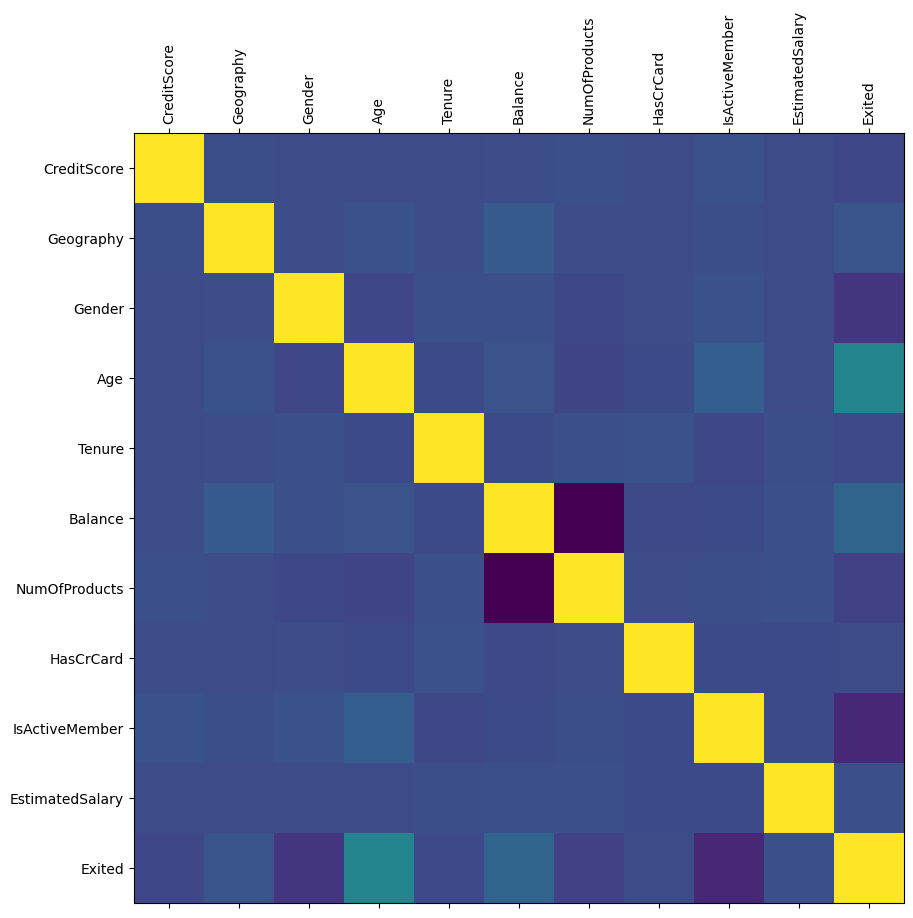

In [109]:
#grafico de correlacion entre columnas 
#preparo el dataset con los datos que quiero
ds = ds.drop(['RowNumber','CustomerId','Surname'], axis=1)

#transformo las columnas categoricas en numericas
from sklearn.preprocessing import LabelEncoder # type: ignore
labelencoder = LabelEncoder()
ds['Geography'] = labelencoder.fit_transform(ds['Geography'])
ds['Gender']= labelencoder.fit_transform(ds['Gender'])

# Me desago de las rows con valores nulos
# Chequeo de valores nulos
nan_count = ds.isnull().sum()

print(ds.isnull().sum())
# Que tantos valores nulos tengo?
if nan_count.sum() < 0.1 * len(ds):
    # Llenar los valores nulos con la media de la columna
    ds = ds.fillna(ds.mean())
else:
    # dropear las filas con valores nulos
    ds = ds.dropna()

print(ds.isnull().sum()) # Verifico que no haya valores nulos

# me aseguro de utilizar las columnas numericas
numeric_columns = ds.select_dtypes(include=[np.number]).columns
ps= ds[numeric_columns].corr()

fig, ax = plt.subplots(figsize=(10, 10))
ax.matshow(ps)
plt.xticks(range(len(ps.columns)), ps.columns)
plt.xticks(rotation=90)
plt.yticks(range(len(ps.columns)), ps.columns)

plt.show()


Siendo que los datos nulos eran muy pocos (3) los quito para el analisis

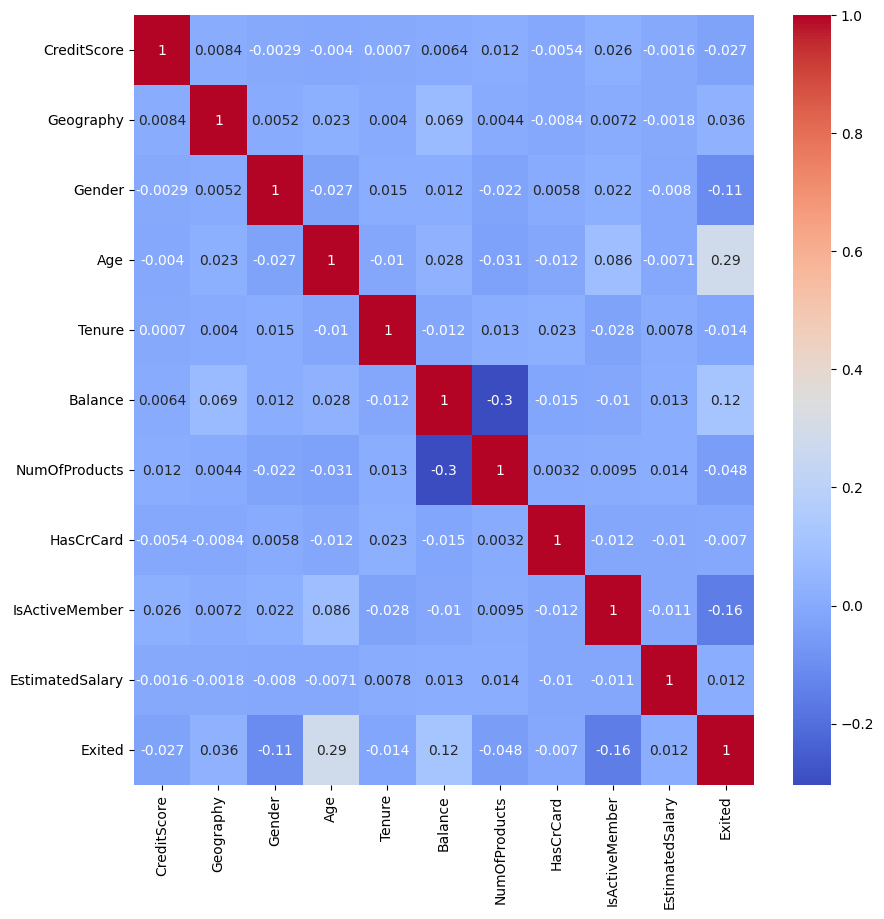

In [110]:
fig, ax =plt.subplots(figsize=(10, 10))
sns.heatmap(ps, annot=True, cmap='coolwarm', ax=ax)
plt.show()

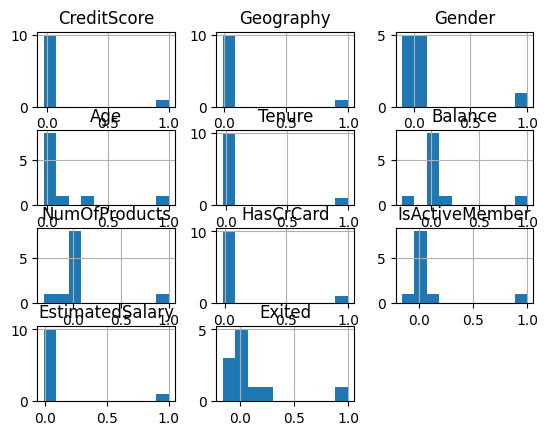

In [111]:
ps.hist()
plt.show()

In [112]:
#instanceo de la informacion para los modelos

from sklearn.model_selection import train_test_split # type: ignore

seed = 42

X = ds.drop("Exited", axis=1)
y = ds["Exited"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed) 



c:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

Accuracy:  0.8015992003998001
Cross Validation:  0.7912763116802


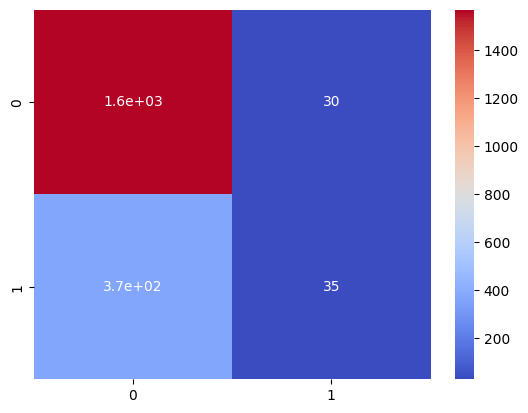

In [113]:
#Regresion logistica
from sklearn.linear_model import LogisticRegression # type: ignore
from sklearn.metrics import accuracy_score # type: ignore
from sklearn.model_selection import cross_val_score # type: ignore
from sklearn.metrics import confusion_matrix # type: ignore

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
acc = accuracy_score(y_test, y_pred)
cv = cross_val_score(lr, X_train, y_train, cv=5)

print("Accuracy: ", acc)
print("Cross Validation: ", cv.mean())

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='coolwarm')
plt.show()

In [114]:
#evaluacion de la regresion logistica

predictions = lr.predict(X_test)
print(predictions)

from sklearn.metrics import classification_report # type: ignore
print(classification_report(y_test, predictions))


[0 0 0 ... 0 0 0]
              precision    recall  f1-score   support

           0       0.81      0.98      0.89      1599
           1       0.54      0.09      0.15       402

    accuracy                           0.80      2001
   macro avg       0.67      0.53      0.52      2001
weighted avg       0.76      0.80      0.74      2001



Se obtiene una precision del 79%

Generamos el grafico ROC-AUC de la Regresion logistica

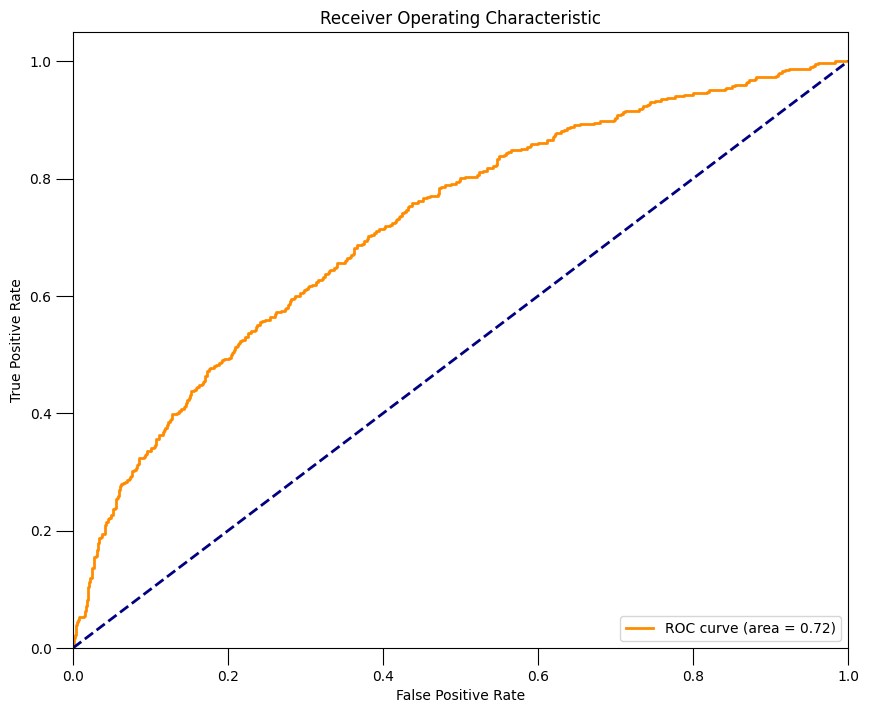

In [115]:
# Compute the ROC curve and AUC score

from sklearn.metrics import roc_curve, auc # type: ignore

# Predict probabilities on the test set
y_prob = lr.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.tick_params(axis='both', direction='out', length=12)
plt.show()

Comienzo a usar modelos de arboles de decision

In [116]:
#arbol de decision
from sklearn.tree import DecisionTreeClassifier # type: ignore

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
acc = accuracy_score(y_test, y_pred)
cv = cross_val_score(dt, X_train, y_train, cv=5)

print("Accuracy: ", acc)
print("Cross Validation: ", cv.mean())


Accuracy:  0.7791104447776112
Cross Validation:  0.789151545908807


In [117]:
#evaluacion del arbol de decision
predictions = dt.predict(X_test)
print(predictions)

from sklearn.metrics import classification_report # type: ignore
print(classification_report(y_test, predictions))


[0 0 0 ... 0 0 0]
              precision    recall  f1-score   support

           0       0.88      0.84      0.86      1599
           1       0.46      0.53      0.49       402

    accuracy                           0.78      2001
   macro avg       0.67      0.69      0.68      2001
weighted avg       0.79      0.78      0.79      2001



Generamos el grafico ROC-AUC del Decition Tree

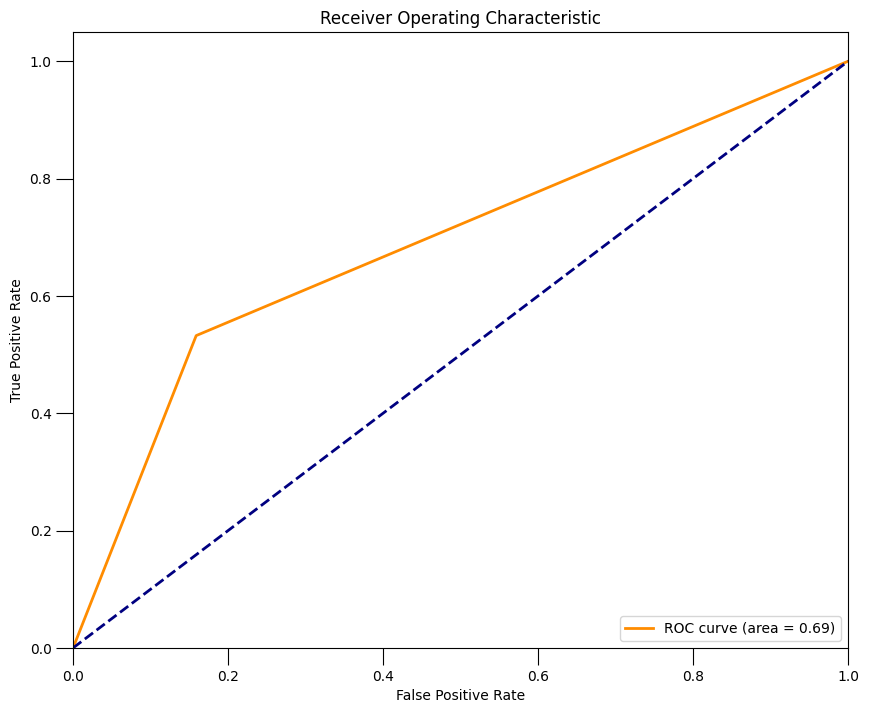

In [118]:
# Compute the ROC curve and AUC score
from sklearn.metrics import roc_curve, auc # type: ignore

# Predict probabilities on the test set
y_prob = dt.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.tick_params(axis='both', direction='out', length=12)
plt.show()

Ahora voy a probar usar randomforest para encontrar los mejores hiperparametros
Pruebo con iteraciones alta, baja y media.

Prueba con muchas iteraciones(100):
Se me va de tiempo, tarada mucho, no llego a ver el resultado.

Prueba pocas iteraciones(5):
muy rapido(1.4s), acuraccy de 83%

Prueba media(25):
media velocidad (4.7s), accuracy 84.7%

Queda en media por ganancia-tiempo

In [119]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier # type: ignore

rf = RandomForestClassifier(n_estimators=25, random_state=seed)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
cv = cross_val_score(rf, X_train, y_train, cv=5)

print("Accuracy: ", acc)
print("Cross Validation: ", cv.mean())

#printeo los mejores hiperparametros para el modelo
print(rf.get_params())

Accuracy:  0.8570714642678661
Cross Validation:  0.8571428794503436
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 25, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [120]:
#evaluacion del random forest
predictions = rf.predict(X_test)
print(predictions)

#confusion matrix
from sklearn.metrics import classification_report # type: ignore
print(classification_report(y_test, predictions))

[0 0 0 ... 0 0 0]
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1599
           1       0.71      0.49      0.58       402

    accuracy                           0.86      2001
   macro avg       0.80      0.72      0.75      2001
weighted avg       0.85      0.86      0.85      2001



Generamos el grafico ROC-AUC del random forest

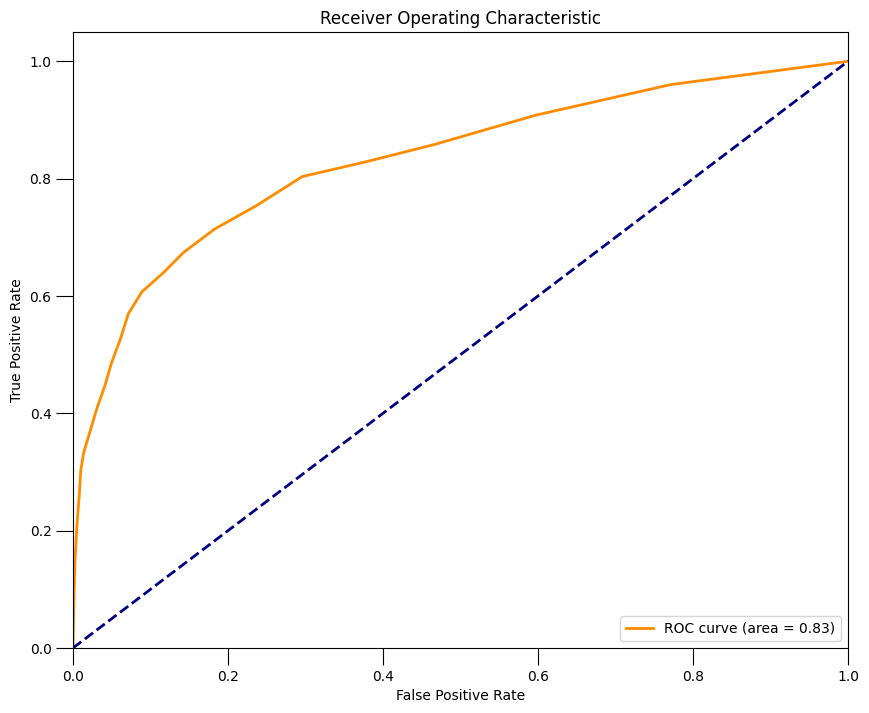

In [121]:
# Compute the ROC curve and AUC score
from sklearn.metrics import roc_curve, auc # type: ignore

# Predict probabilities on the test set
y_prob = rf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.tick_params(axis='both', direction='out', length=12)
plt.show()

Aca se termina el tp con una conclusion de cual es la categorizacion de persona que es mas propensa a dejar el banco (output=1) y cual de que se quede (output=0)

In [122]:
#evaluacion mas propensa a irse con sus valores 
import numpy as np # type: ignore

# Obtener los coeficientes del modelo de regresión logística
coefficients = lr.coef_[0]

# Crear un DataFrame con los nombres de las columnas y los coeficientes
coef_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

# Mostrar los coeficientes más importantes
print(coef_df)


           Feature  Coefficient
1        Geography     0.067210
3              Age     0.047867
5          Balance     0.000004
9  EstimatedSalary     0.000003
0      CreditScore    -0.003784
4           Tenure    -0.052903
7        HasCrCard    -0.136124
6    NumOfProducts    -0.357172
2           Gender    -0.488949
8   IsActiveMember    -0.745420
